# Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_pizzas = pd.read_csv(r'Datawarehouse\pizzas_normales.csv')

df_especiales = pd.read_csv(r'Datawarehouse\pizzas_especiales.csv')

# EDA

In [3]:
df_pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          453 non-null    int64  
 1   nombre          453 non-null    object 
 2   fecha           453 non-null    object 
 3   mes             453 non-null    object 
 4   unidades_gr     453 non-null    float64
 5   unidades_ch     453 non-null    float64
 6   venta_gr        453 non-null    float64
 7   venta_ch        453 non-null    float64
 8   unidades_total  453 non-null    float64
 9   venta_total     453 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 35.5+ KB


In [4]:
# Realizar el group by 'codigo' y sumar las 'unidades'
top_pizzas_unidades = df_pizzas.groupby(['codigo', 'nombre'])['unidades_total'].sum().reset_index()

In [5]:
# Ordenar el resultado de mayor a menor
top_pizzas_unidades = top_pizzas_unidades.sort_values(by='unidades_total', ascending=False)

## Top 4 Pizzas mas vendidas

In [10]:
pizzas_top = df_pizzas[df_pizzas['codigo'].isin(top_pizzas_unidades['codigo'].head(4))]

# Agrupar por Producto y Mes para obtener los datos de ventas por mes
ventas_por_mes = pizzas_top[['nombre', 'mes', 'unidades_total']].groupby(['nombre', 'mes']).sum().reset_index()

# Obtener listas únicas de productos y meses
productos = ventas_por_mes['nombre'].unique()

# Ordenar los meses correctamente
orden_meses = ['January', 'February', 'March', 'April', 'May']
ventas_por_mes['mes'] = pd.Categorical(ventas_por_mes['mes'], categories=orden_meses, ordered=True)


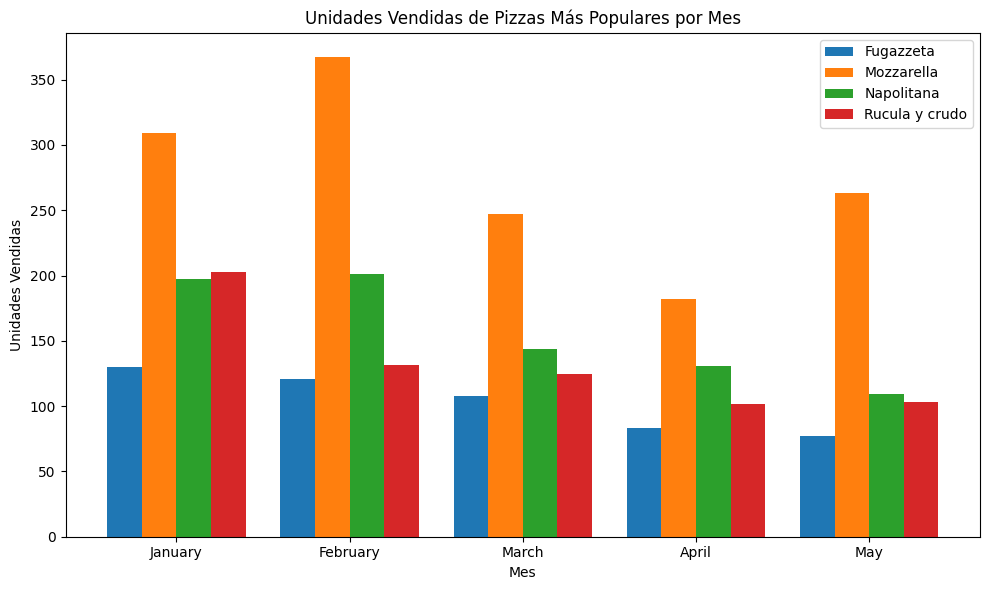

In [11]:
# Configurar el gráfico de barras de conjunto múltiple
plt.figure(figsize=(10, 6))

# Iterar sobre cada producto para graficar las barras
ancho_barra = 0.2  # Ancho de cada barra
for i, producto in enumerate(productos):
    ventas_producto = ventas_por_mes[ventas_por_mes['nombre'] == producto].sort_values('mes')
    posiciones_x = [pos + i * ancho_barra for pos in range(len(ventas_producto))]
    plt.bar(posiciones_x, ventas_producto['unidades_total'], width=ancho_barra, label=producto)

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.title('Unidades Vendidas de Pizzas Más Populares por Mes')
plt.xticks([pos + (len(productos) / 2 - 0.5) * ancho_barra for pos in range(len(orden_meses))], orden_meses)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Proporción respecto al Total (Top 50)

In [12]:
pizzas_unidades = df_pizzas.groupby(['codigo', 'nombre'])['unidades_total'].sum().reset_index()

pizzas_unidades = pizzas_unidades[pizzas_unidades['codigo'].isin(top_pizzas_unidades['codigo'].head(50))]

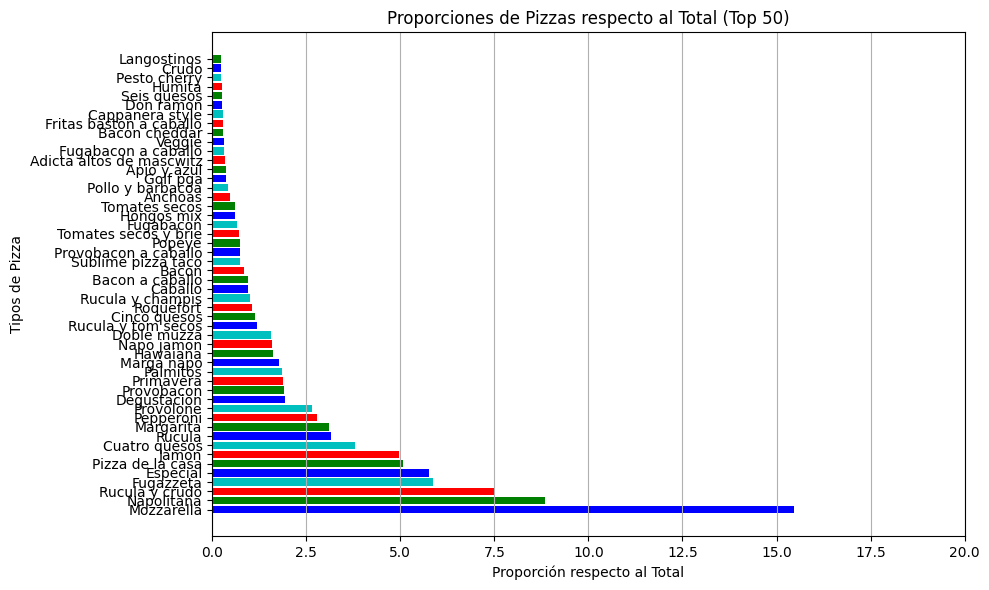

In [15]:
# Calcular el porcentaje respecto al total
pizzas_unidades['porcentaje'] = (pizzas_unidades['unidades_total'] / pizzas_unidades['unidades_total'].sum()) * 100

# Ordenar porcentaje descendente para visualización
pizzas_unidades = pizzas_unidades.sort_values(by='porcentaje', ascending=False)

plt.figure(figsize=(10, 6))

# Gráfico de barras horizontales apiladas
plt.barh(pizzas_unidades['nombre'], pizzas_unidades['porcentaje'], color=['b', 'g', 'r', 'c'])

plt.xlabel('Proporción respecto al Total')
plt.ylabel('Tipos de Pizza')
plt.title('Proporciones de Pizzas respecto al Total (Top 50)')
plt.xlim(0, 20)  # Establecer límites para el eje x
plt.grid(True, axis='x')  # Mostrar líneas de la cuadrícula en el eje x
plt.tight_layout()

plt.show()

## Total de unidades por mes

In [23]:
unidades_totales_mes = df_pizzas.groupby('mes')['unidades_total'].sum().reset_index()

# Ordenar los meses correctamente
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June']
unidades_totales_mes['mes'] = pd.Categorical(unidades_totales_mes['mes'], categories=orden_meses, ordered=True)

# Ordenar el DataFrame por los meses categóricos
unidades_totales_mes = unidades_totales_mes.sort_values('mes')

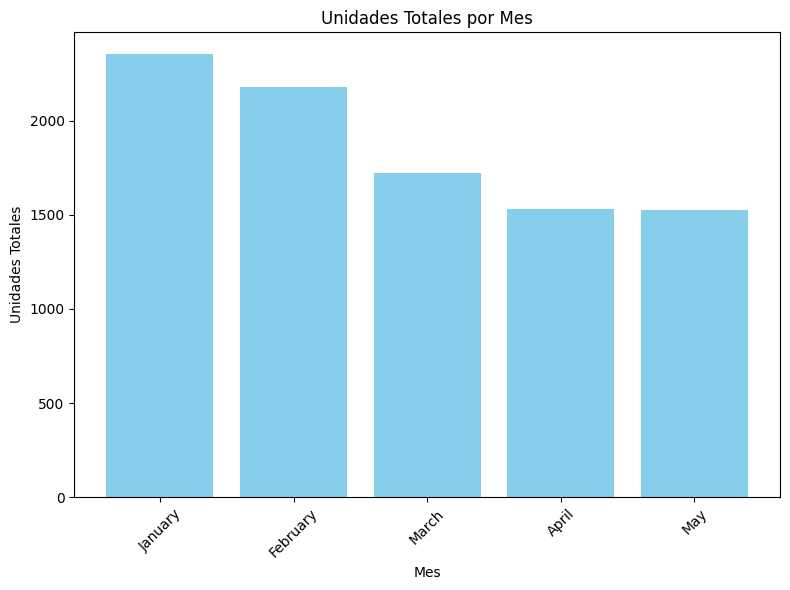

In [24]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(unidades_totales_mes['mes'], unidades_totales_mes['unidades_total'], color='skyblue')

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Unidades Totales')
plt.title('Unidades Totales por Mes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()